# Exercicio con datos de Taxis de New York

Eres el profesional de datos más nuevo en una empresa de consultoría de datos ficticia llamada Automatidata. El equipo está en las etapas iniciales del proyecto, recién ha completado un plan de acción inicial y algunos trabajos de codificación en Python.

Luana Rodríguez, la analista de datos senior en Automatidata, está satisfecha con el trabajo que has realizado hasta ahora y te solicita ayuda con el análisis exploratorio de datos (EDA) y la visualización de datos para el proyecto de la Comisión de Taxis y Limusinas de la Ciudad de Nueva York (New York City TLC) para tener una comprensión general de cómo se ve el uso de los taxis. El equipo directivo solicita un cuaderno de Python que muestre la estructuración y limpieza de los datos, así como visualizaciones de matplotlib/seaborn para ayudar a comprender los datos. Como mínimo, incluye un diagrama de caja de las duraciones de los viajes y algunas gráficas de series temporales, como un desglose por trimestre o mes.

Además, el equipo directivo ha solicitado recientemente que todas las EDA incluyan visualizaciones en Tableau. Para estos datos de taxis, crea un panel de control en Tableau que muestre un mapa de la Ciudad de Nueva York con los viajes en taxi/limusina por mes. Asegúrate de que sea fácil de entender para alguien que no tenga experiencia en datos y recuerda que el director asistente de New York City TLC tiene discapacidad visual.

Se ha estructurado y preparado un cuaderno para ayudarte en este proyecto. Por favor, completa las siguientes preguntas.

En esta actividad, examinarás los datos proporcionados y los prepararás para su análisis. También diseñarás una visualización de datos profesional que cuente una historia y ayude a tomar decisiones basadas en datos para las necesidades comerciales.

Ten en cuenta que la actividad de visualización en Tableau es opcional y no afectará la finalización del curso. Completar la actividad de Tableau te ayudará a practicar la planificación y creación de una visualización de datos basada en una necesidad comercial específica. La estructura de esta actividad está diseñada para emular las propuestas que probablemente se te asignarán en tu carrera como profesional de datos. Completar esta actividad te ayudará a prepararte para esos momentos profesionales.

**El propósito** de este proyecto es realizar un análisis exploratorio de datos en un conjunto de datos proporcionado. Tu misión es continuar la investigación que comenzaste en la actividad C2 y realizar un EDA adicional en estos datos con el objetivo de aprender más sobre las variables.

**El objetivo** es limpiar el conjunto de datos y crear una visualización.
<br/>
*Esta actividad consta de 4 partes:*

**Parte 1:** Importaciones, enlaces y carga de datos.

**Parte 2:** Exploración de datos
* Limpieza de datos

**Parte 3:** Construcción de visualizaciones.

**Parte 4:** Evaluación y compartición de resultados.

<br/>
Sigue las instrucciones y responde las preguntas a continuación para completar la actividad. Luego, completarás un Resumen Ejecutivo utilizando las preguntas enumeradas en el Documento de Estrategia PACE.

Asegúrate de completar esta actividad antes de continuar. El siguiente elemento del curso te proporcionará un ejemplo completo para comparar con tu propio trabajo.

# Visualize una story en Tableau y Python

A lo largo de estos cuadernos de proyecto, verás referencias al marco de resolución de problemas PACE. Los siguientes componentes del cuaderno están etiquetados con la etapa PACE correspondiente: Planificar, Analizar, Construir y Ejecutar.

## PACE: Planificar

En esta etapa, considera las siguientes preguntas, cuando corresponda, para completar tu respuesta en código:

**Respuesta ejemplar:**

1. Identificar cualquier valor atípico (outlier):

* ¿Cuáles son los mejores métodos para identificar valores atípicos?
  * Utilizar funciones de numpy para investigar la  `mean()`  (media) y  `median()`  (mediana) de los datos y comprender el rango de los valores de los datos.
  * Utilizar un diagrama de caja (boxplot) para visualizar la distribución de los datos.
  * Utilizar histogramas para visualizar la distribución de los datos.
* ¿Cómo se toma la decisión de mantener o excluir los valores atípicos de los modelos futuros?
  * Hay tres opciones principales para tratar los valores atípicos: mantenerlos tal como están, eliminarlos o reasignarlos. La decisión de mantener los valores atípicos, eliminarlos o reasignarles valores se toma teniendo en cuenta la naturaleza de los datos atípicos y las suposiciones del modelo que se está construyendo. Para ayudarte a tomar la decisión, puedes comenzar con estas pautas generales:

      * Eliminarlos: Si estás seguro de que los valores atípicos son errores, errores de escritura o errores y el conjunto de datos se utilizará para modelado o aprendizaje automático, es más probable que decidas eliminar los valores atípicos. De las tres opciones, esta es la que menos utilizarás.
      * Reasignarlos: Si el conjunto de datos es pequeño y/o los datos se utilizarán para modelado o aprendizaje automático, es más probable que elijas un camino de derivar nuevos valores para reemplazar los valores atípicos.
      * Dejarlos: Para un conjunto de datos en el que planeas realizar un análisis exploratorio de datos o para un conjunto de datos que estás preparando para un modelo que es resistente a los valores atípicos, es más probable que decidas dejarlos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 

In [2]:
ls

'2017_Yellow_Taxi_Trip_Data (2).csv'
 2017_Yellow_Taxi_Trip_Data.csv
 Analyze.png
 automatidata_project_lab.ipynb
 Construct.png
 Execute.png
'Exemplar_Course 3 Automatidata project lab.ipynb'
 ex_wase/
 Pace.png
 Plan.png


In [3]:
df=pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [4]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [5]:
df.size

408582

In [6]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

**Nota ejemplar:** No hay datos faltantes según los resultados de la función  `info()` .

### Tarea 2b. Evaluar si las dimensiones y medidas son correctas

En la página de origen de datos en Tableau, verifica nuevamente los tipos de datos de las columnas aplicables que seleccionaste en el paso anterior. Presta mucha atención a las dimensiones y medidas para asegurarte de que sean correctas.

En Python, considera los tipos de datos de las columnas. *Considera:* ¿Tienen sentido?

Como verás a continuación, un gráfico de barras, un diagrama de caja y un gráfico de dispersión serán de gran ayuda para comprender estos datos.

* Un diagrama de caja será útil para determinar los valores atípicos y dónde se encuentran la mayoría de los puntos de datos en términos de  `trip_distance`  (distancia del viaje),  `duration`  (duración) y  `total_amount`  (monto total).

* Un gráfico de dispersión será útil para visualizar las tendencias, patrones y valores atípicos de variables críticas, como  `trip_distance`  y  `total_amount` .

* Un gráfico de barras ayudará a determinar el promedio de viajes por mes, día de la semana, fin de semana, etc.

Selecciona tipos de visualización de datos que te ayudarán a comprender y explicar los datos.
Ahora que sabes qué columnas de datos usarás, es hora de decidir qué tipo de visualización de datos tiene más sentido para el EDA del conjunto de datos de TLC. ¿Qué tipo(s) de visualización de datos serían más útiles?

* Gráfico de líneas
* Gráfico de barras
* Diagrama de caja
* Histograma
* Mapa de calor
* Gráfico de dispersión
* Un mapa geográfico

Como verás a continuación, un gráfico de barras, un diagrama de caja y un gráfico de dispersión serán de gran ayuda para comprender estos datos.

* Un diagrama de caja será útil para determinar valores atípicos y dónde se encuentran la mayoría de los puntos de datos en términos de  `trip_distance` ,  `duration`  y  `total_amount` .

* Un gráfico de dispersión ayudará a visualizar las tendencias, patrones y valores atípicos de variables críticas, como  `trip_distance`  y  `total_amount` .

* Un gráfico de barras ayudará a determinar el número promedio de viajes por mes, día de la semana, fin de semana, etc.

## Boxplots

Realiza una verificación de valores atípicos en columnas relevantes como la distancia y la duración del viaje. Recuerda que algunas de las mejores formas de identificar la presencia de valores atípicos en los datos son los diagramas de caja y los histogramas.
**Nota:** Recuerda convertir tus columnas de fecha a formato de fecha y hora para poder derivar la duración total del viaje.

In [8]:
# Convert data columns to datetime
df['tpep_pickup_datetime']  =pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] =pd.to_datetime(df['tpep_dropoff_datetime'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

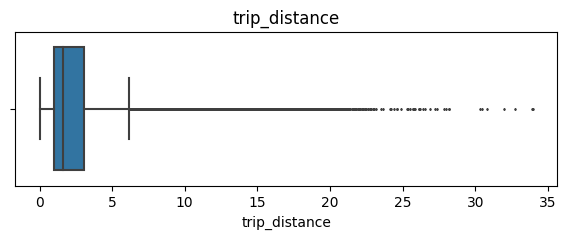

In [10]:
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

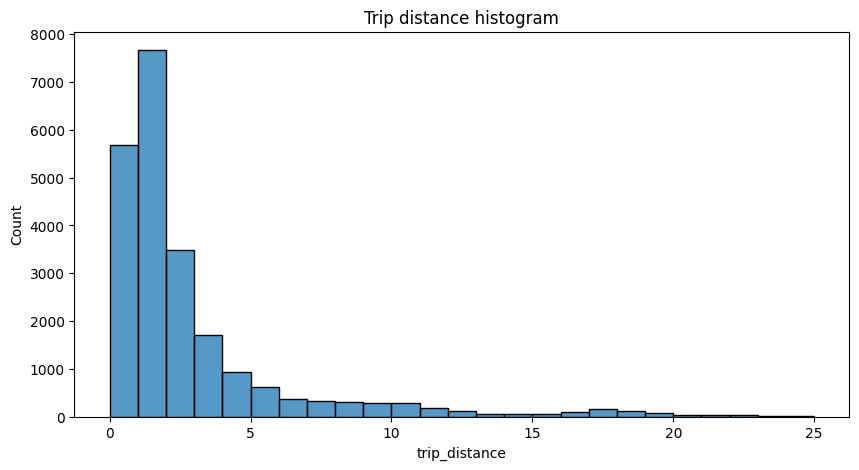

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

La mayoría de los viajes fueron recorridos de menos de dos millas. El número de viajes disminuye rápidamente a medida que la distancia recorrida supera las dos millas.

**total_amount**

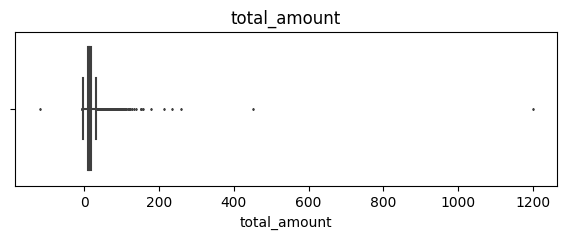

In [12]:
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

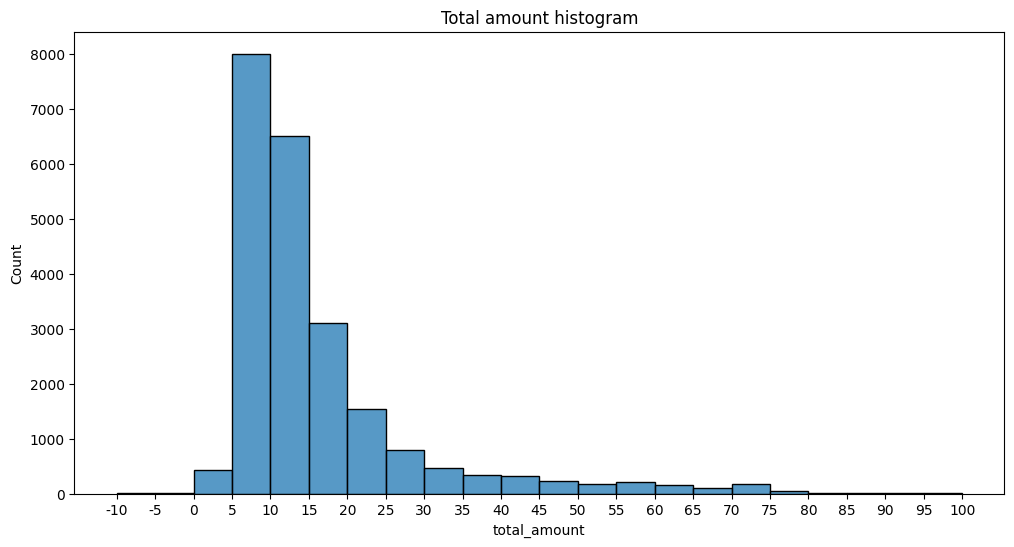

In [13]:
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

El costo total de cada viaje también tiene una distribución sesgada hacia la derecha, con la mayoría de los costos en el rango de $5 a $15.

**tip_amount**

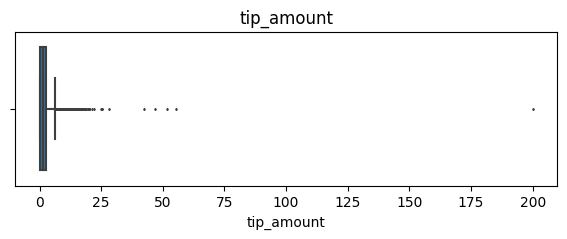

In [14]:
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

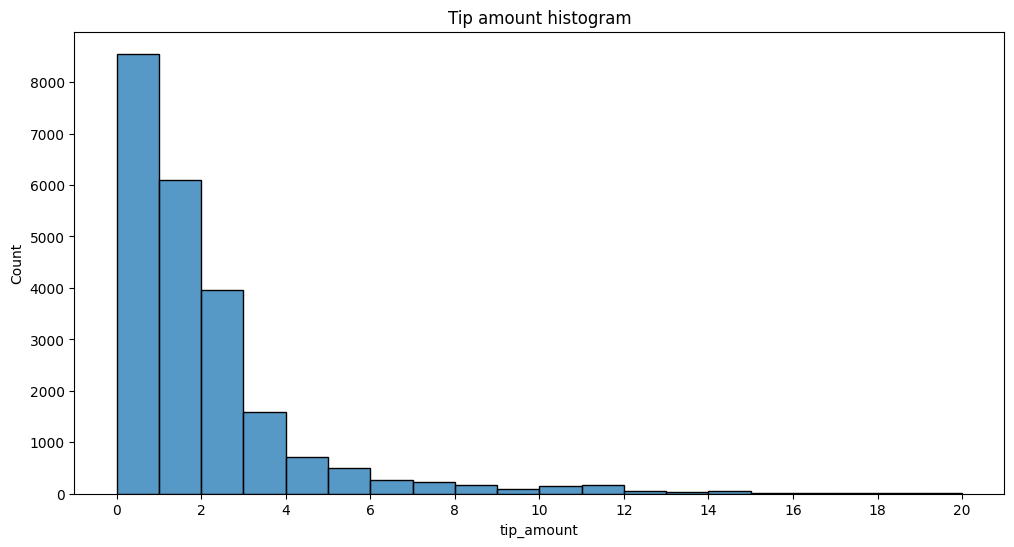

In [15]:
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

La distribución del monto de la propina está sesgada hacia la derecha, con casi todas las propinas en el rango de $0 a $3.

**tip_amount by vendor**

In [34]:
# sns.histplot?

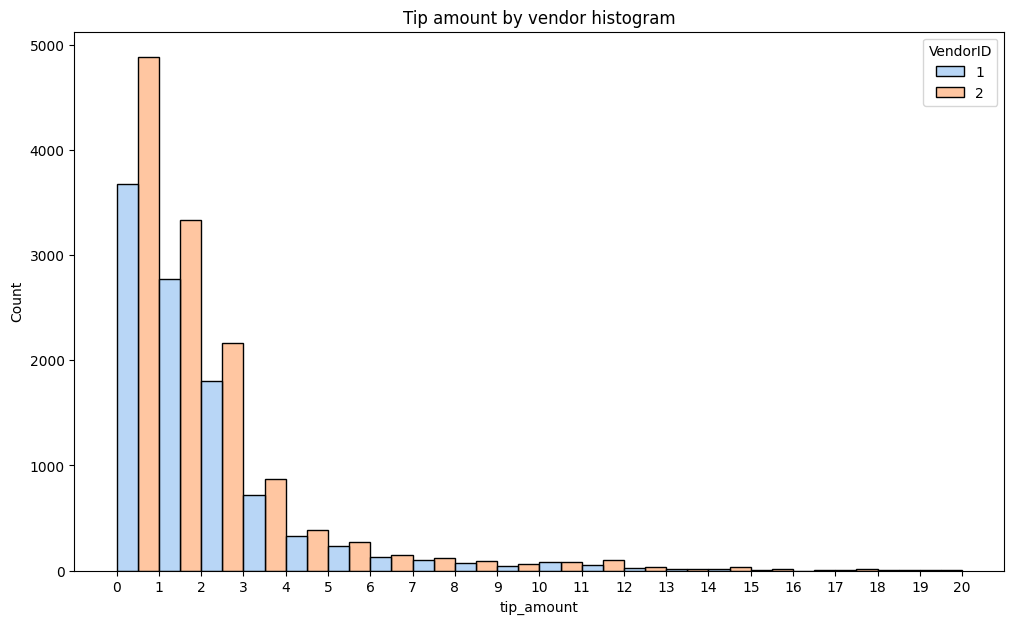

In [32]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='dodge',   # 'layer', 'stack', 'fill', 'dodge'
                  palette='pastel'
            
                  )
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

Separar el monto de la propina por proveedor revela que no hay aberraciones notables en la distribución de propinas entre los dos proveedores en el conjunto de datos. El proveedor dos tiene una parte ligeramente mayor de los viajes, y esta proporción se mantiene aproximadamente para todos los montos de propina.
A continuación, enfóquese en el extremo superior del rango de propinas para verificar si el proveedor uno recibe propinas más generosas de manera notable.

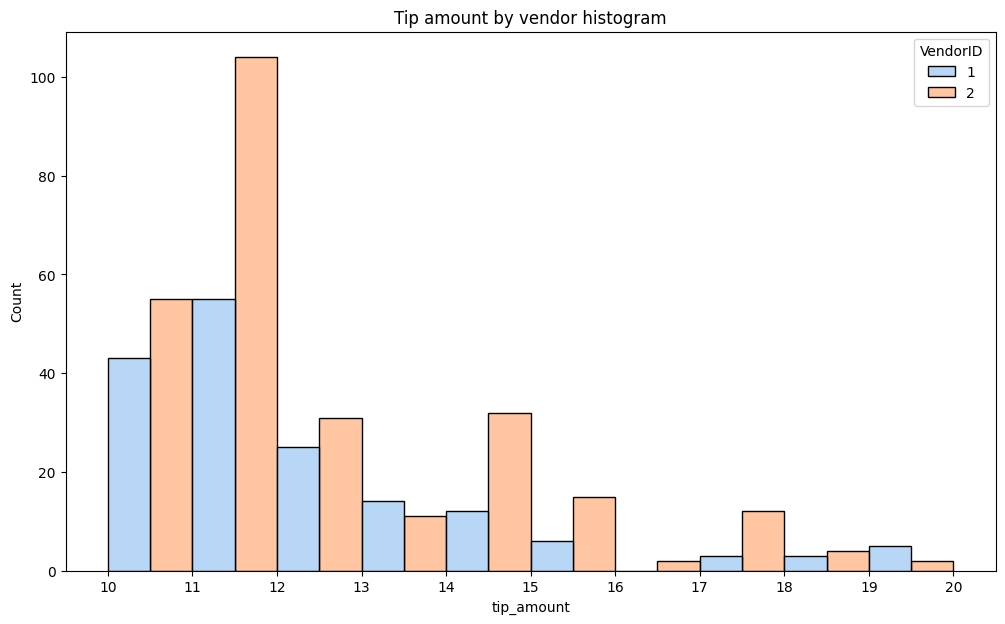

In [36]:
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='dodge',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

Las proporciones se mantienen incluso en estos montos de propina más altos, con la excepción de los extremos más altos, pero esto no es notable debido al tamaño de muestra bajo en estos montos de propina.

**Promedio de propinas por cantidad de pasajeros**
Examina los valores únicos en la columna  `passenger_count` .

In [37]:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

**Nota de ejemplo:** Casi dos tercios de los viajes fueron de ocupación individual, aunque aún hubo casi 700 viajes con hasta seis pasajeros. Además, hay 33 viajes con un recuento de ocupación de cero, lo cual no tiene sentido. Es probable que estos se eliminen a menos que se encuentre una explicación razonable para ellos.

In [39]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby(['passenger_count'])\
    .mean(numeric_only=True)[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


In [43]:
df['tip_amount'].mean()

1.8357813119520685

passenger_count
1    3
2    2
3    5
4    0
5    1
6    4
Name: tip_amount, dtype: int64


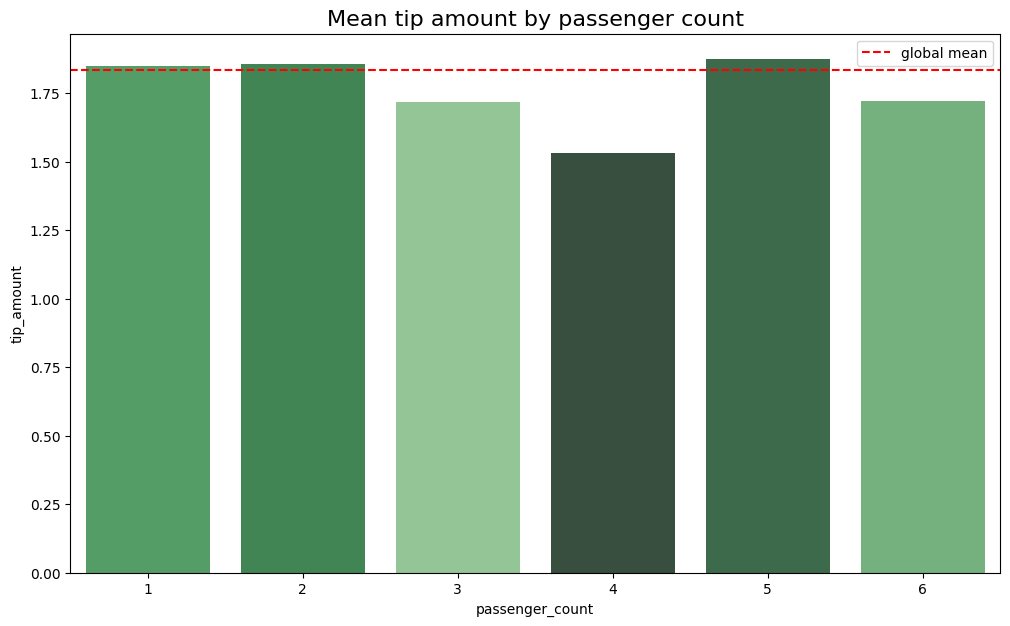

In [109]:
data = mean_tips_by_passenger_count.tail(-1)

pal = sns.color_palette("Greens_d", len(data))

rank = data['tip_amount'].argsort()
print(rank )
plt.figure(figsize=(12,7))

ax = sns.barplot(x = data.index,
                 y = data['tip_amount'],
                 palette = np.array(pal[::-1])[rank])

ax.axhline(df['tip_amount'].mean(), 
            ls='--', 
            color='red', 
            label='global mean')

# ax.axhline(1, ls=':', color='blue',label='azul line')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);

**Nota de ejemplo:** El monto promedio de propina varía muy poco según la cantidad de pasajeros. Aunque disminuye notablemente para los viajes de cuatro pasajeros, se espera que haya un mayor grado de fluctuación debido a que los viajes con cuatro pasajeros fueron los menos abundantes en el conjunto de datos (aparte de los viajes sin pasajeros).

In [57]:
df['month'] = df['tpep_pickup_datetime'].dt.month_name(locale="es_ES.UTF-8")
df['day'] = df['tpep_pickup_datetime'].dt.day_name(locale="es_ES.UTF-8")

In [58]:
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,Marzo,Sábado
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,Abril,Martes
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,Diciembre,Viernes
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,Mayo,Domingo
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,Abril,Sábado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,Febrero,Viernes
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,Agosto,Domingo
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,Septiembre,Lunes
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,Julio,Sábado


In [59]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

Marzo         2049
Octubre       2027
Abril         2019
Mayo          2013
Enero         1997
Junio         1964
Diciembre     1863
Noviembre     1843
Febrero       1769
Septiembre    1734
Agosto        1724
Julio         1697
Name: month, dtype: int64

In [60]:
# Reorder the monthly ride list so months go in order
month_order = "Enero Febrero Marzo Abril Mayo Junio Julio Agosto Octubre Noviembre Diciembre".split()
monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

Enero        1997
Febrero      1769
Marzo        2049
Abril        2019
Mayo         2013
Junio        1964
Julio        1697
Agosto       1724
Octubre      2027
Noviembre    1843
Diciembre    1863
Name: month, dtype: int64

In [61]:
monthly_rides.index

Index(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')

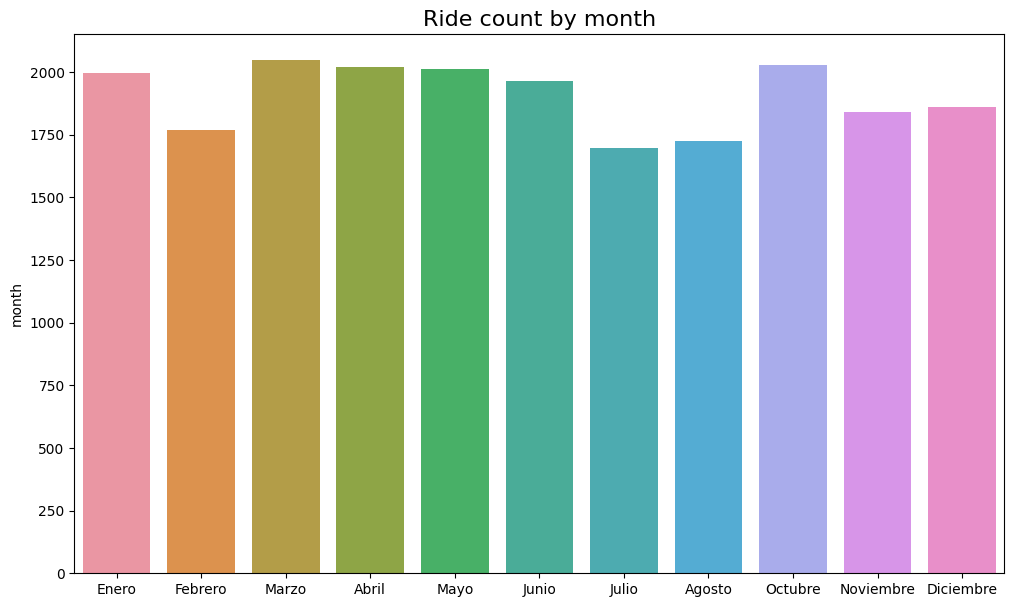

In [62]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

**Nota de ejemplo:** Los viajes mensuales son bastante consistentes, con caídas significativas en los meses de verano de julio, agosto y septiembre, así como en febrero.

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

**Graficar el número total de viajes por día**
Repite el proceso anterior, pero ahora calcula el número total de viajes por día de la semana.

In [67]:
# Repeat the above process, this time for rides by day
daily_rides = df['day'].value_counts()
day_order = "Lunes Martes Miércoles Jueves Viernes Sábado Domingo".split()
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

Lunes        2931
Martes       3198
Miércoles    3390
Jueves       3402
Viernes      3413
Sábado       3367
Domingo      2998
Name: day, dtype: int64

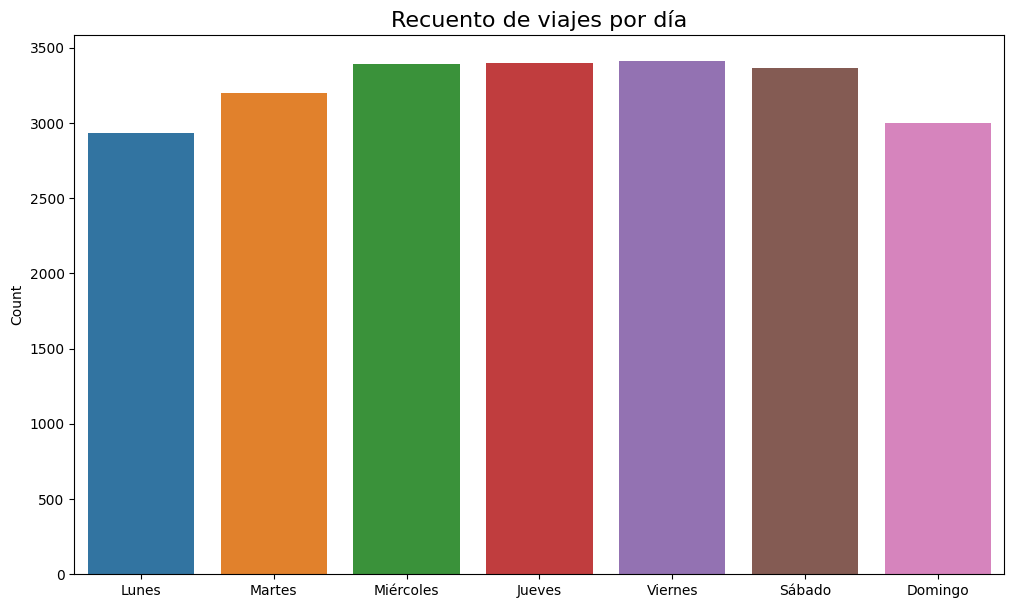

In [72]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Recuento de viajes por día', fontsize=16);

In [70]:
total_amount_day = df.groupby('day').sum(numeric_only=True)[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Lunes,49574.37
Martes,52527.14
Miércoles,55310.47
Jueves,57181.91
Viernes,55818.74
Sábado,51195.40
Domingo,48624.06


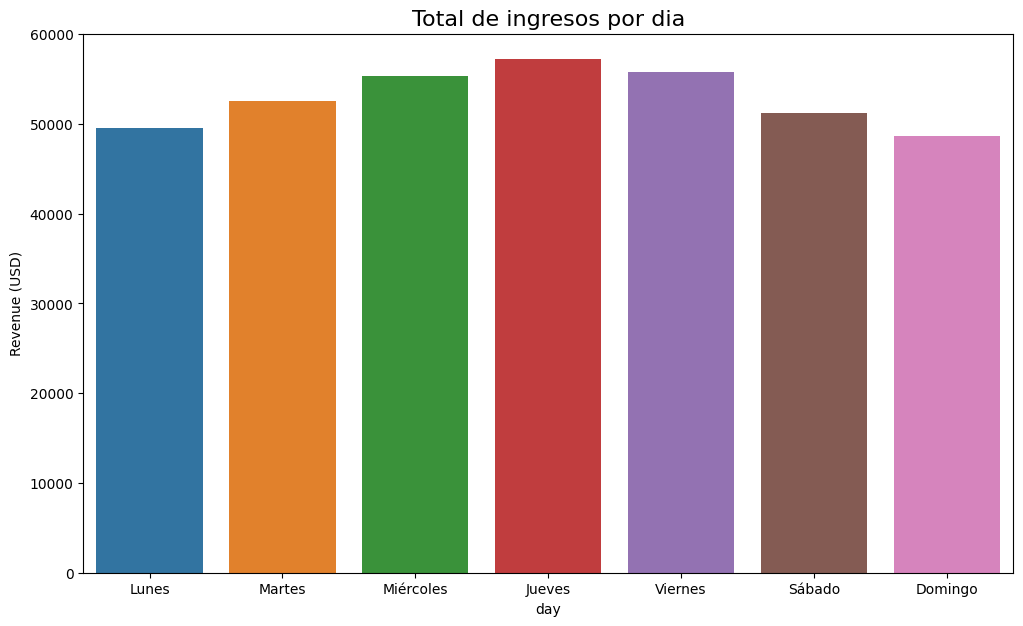

In [73]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total de ingresos por dia', fontsize=16);

**Nota de ejemplo:** El jueves tuvo la mayor ganancia bruta de todos los días, mientras que el domingo y el lunes tuvieron la menor. Curiosamente, aunque el sábado tuvo solo 35 viajes menos que el jueves, sus ingresos brutos fueron ~$6,000 menos que los del jueves, lo que representa una caída de más del 10%.

In [75]:
total_amount_month = df.groupby('month').sum(numeric_only=1)[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
Enero,31735.25
Febrero,28937.89
Marzo,33085.89
Abril,32012.54
Mayo,33828.58
Junio,32920.52
Julio,26617.64
Agosto,27759.56
Octubre,33065.83


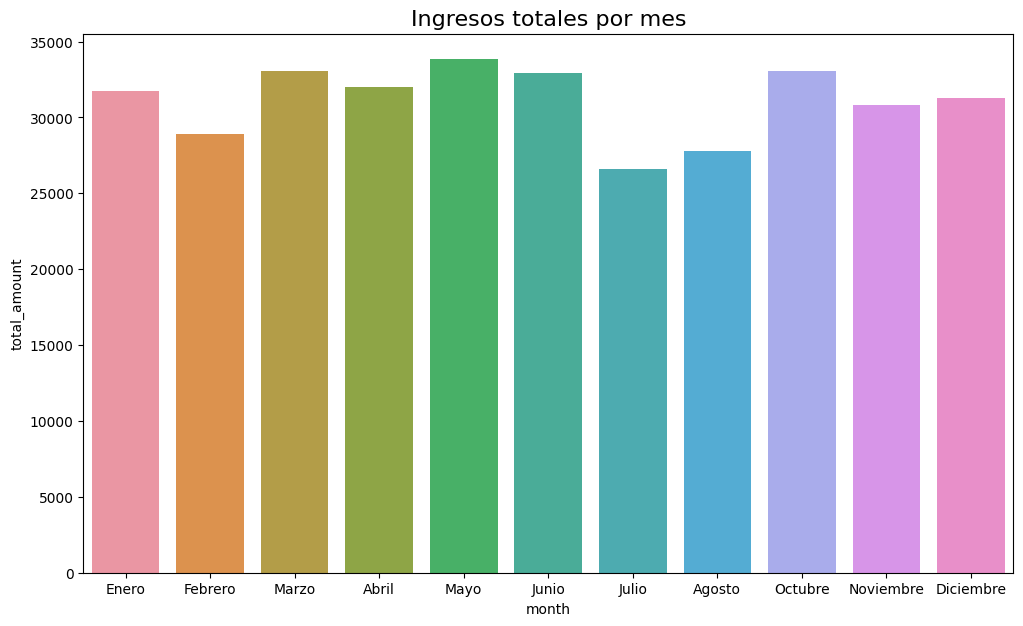

In [76]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Ingresos totales por mes', fontsize=16);

**Nota de ejemplo:** Los ingresos mensuales siguen generalmente el patrón de los viajes mensuales, con caídas notables en los meses de verano de julio, agosto y septiembre, y también en febrero.

Puedes crear un gráfico de dispersión en Tableau Public, lo cual puede ser más fácil de manipular y presentar. Si deseas instrucciones paso a paso, puedes revisar el siguiente enlace. Estas instrucciones crean un gráfico de dispersión que muestra la relación entre total_amount y trip_distance. Considera agregar la visualización de Tableau a tu resumen ejecutivo y añadir ideas clave de tus hallazgos sobre esas dos variables.

In [77]:
df['DOLocationID'].nunique()

216

In [81]:
distance_by_dropoff = df.groupby('DOLocationID').mean(numeric_only=1)[['trip_distance']]

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff 

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


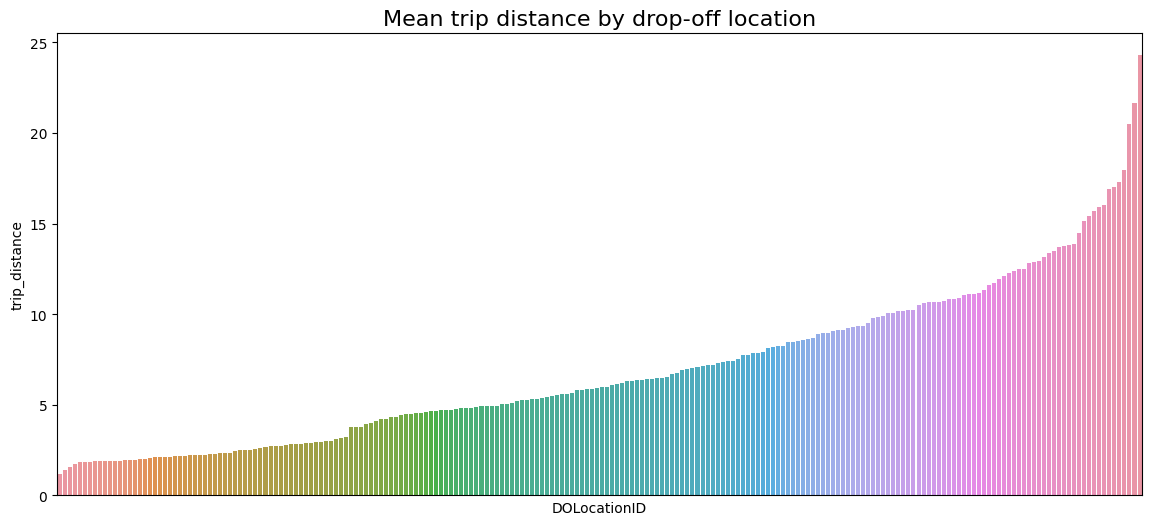

In [82]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

**Nota de ejemplo:** Este gráfico presenta una curva característica relacionada con la función de densidad acumulativa de una distribución normal. En otras palabras, indica que los puntos de entrega están distribuidos de manera relativamente uniforme sobre el terreno. Esto es bueno saberlo, porque las coordenadas geográficas no se incluyeron en este conjunto de datos, por lo que no había una forma obvia de probar la distribución de las ubicaciones.
Para confirmar esta conclusión, considera el siguiente experimento:
1. Crea una muestra de coordenadas a partir de una distribución normal, en este caso 1,500 pares de puntos de una distribución normal con una media de 10 y una desviación estándar de 5.
2. Calcula la distancia entre cada par de coordenadas.
3. Agrupa las coordenadas por punto final y calcula la distancia promedio entre ese punto final y todos los demás puntos con los que se emparejó.
4. Grafica la distancia promedio para cada punto final único.

In [84]:
# np.random.normal?

In [86]:
np.random.normal(10, 5, (3000, 2))

array([[10.2329815 , 11.30926825],
       [14.10073793, 14.48762056],
       [12.55954279, 13.78233281],
       ...,
       [11.09296173,  9.50413085],
       [ 5.42912139, 14.04076552],
       [10.59119047,  8.62555943]])

In [94]:
# Generar puntos aleatorios en un plano 2D a partir de una distribución normal
test   = np.round(np.random.normal(10, 5, (3000, 2)), 1)
mitad  = int(len(test)/2) # Calcular punto medio del arreglo de coordenadas
inicio = test[:mitad]     # Aislar la primera mitad del arreglo ("ubicaciones de recogida")
fin    = test[mitad:]     # Aislar la segunda mitad del arreglo ("ubicaciones de entrega")

In [95]:

# 2. Calculate Euclidean distances between points in first half and second half of array
distances = (inicio  - fin)**2
distances

array([[  4.41,  26.01],
       [ 51.84,  70.56],
       [ 46.24,  28.09],
       ...,
       [179.56,  30.25],
       [ 13.69,  13.69],
       [  1.44,  16.  ]])

In [96]:
           
distances = distances.sum(axis=-1)
print(distances)
distances = np.sqrt(distances)
distances 


[ 30.42 122.4   74.33 ... 209.81  27.38  17.44]


array([ 5.51543289, 11.06345335,  8.62148479, ..., 14.48481964,
        5.23259018,  4.1761226 ])

In [97]:

# 3. Group the coordinates by "drop-off location", compute mean distance
test_df = pd.DataFrame({'inicio': [tuple(x) for x in inicio.tolist()],
                   'fin': [tuple(x) for x in fin.tolist()],
                   'distancia': distances})
data = test_df[['fin', 'distancia']].groupby('fin').mean()
data = data.sort_values(by='distancia')

data


,distancia
fin,
"(7.8, 10.1)",0.141421
"(9.3, 13.6)",0.509902
"(14.3, 15.3)",0.640312
"(6.1, 12.1)",0.721110
"(8.0, 7.4)",0.761577
...,...
"(-10.8, 11.2)",25.521951
"(21.3, 4.4)",26.132355
"(17.6, -3.8)",26.460915


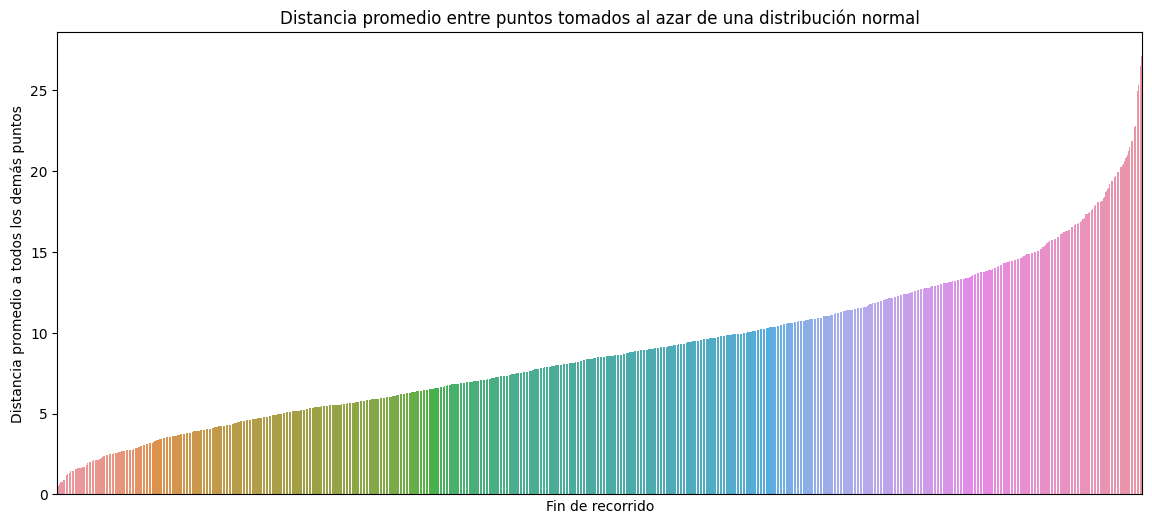

In [99]:
# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(14,6))
ax = sns.barplot(x=data.index,
                 y=data['distancia'],
                 order=data.index)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Fin de recorrido')

ax.set_ylabel('Distancia promedio a todos los demás puntos')
ax.set_title('Distancia promedio entre puntos tomados al azar de una distribución normal')

#ax.set_ylabel('Mean distance to all other points')
#ax.set_title('Mean distance between points taken randomly from normal distribution');
plt.show()

La curva descrita por este gráfico es casi idéntica a la distancia promedio recorrida por cada viaje en taxi a cada ubicación de destino. Esto revela que las ubicaciones de destino en el conjunto de datos de taxis están distribuidas de manera uniforme geográficamente. Sin embargo, debes tener en cuenta que esto no significa que haya una distribución uniforme de *viajes* a cada punto de destino. Examina esto a continuación.

In [100]:
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 


49

**Nota de ejemplo:** Hay 49 números que no representan una ubicación de destino.
Para eliminar los espacios en el histograma que estos números faltantes crearían, ordena los valores únicos de las ubicaciones de destino, luego conviértelos en cadenas de texto. Esto hará que la función histplot muestre todas las barras directamente una al lado de la otra.

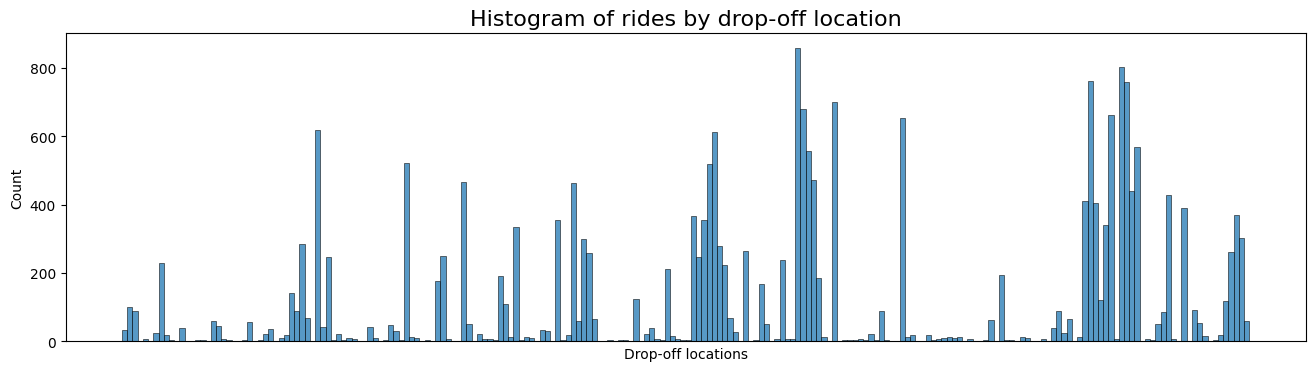

In [101]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

**Nota de ejemplo:** Observa que de las 200+ ubicaciones de destino, un número desproporcionado de ubicaciones recibe la mayoría del tráfico, mientras que todas las demás reciben relativamente pocos viajes. Es probable que estas ubicaciones de alto tráfico estén cerca de atracciones turísticas populares como el Empire State Building o Times Square, aeropuertos y terminales de trenes y autobuses. Sin embargo, sería útil saber a qué ubicación corresponde cada ID. Desafortunadamente, esta información no está en los datos.

<img src="Execute.png" width="100" height="100" align=left>

## PACE: Execute 

Consider the PACE Strategy Document to reflect on the Execute stage.

### Tarea 4a. Resultados y evaluación
Después de haber construido visualizaciones en Tableau y en Python, ¿qué has aprendido sobre el conjunto de datos? ¿Qué otras preguntas han revelado tus visualizaciones que deberías investigar?
***Consejo profesional:*** Ponte en la perspectiva de tu cliente. ¿Qué les gustaría saber?
Utiliza los siguientes campos de código para realizar cualquier EDA adicional basada en las visualizaciones que ya has creado. También utiliza el espacio para asegurarte de que tus visualizaciones sean limpias, fácilmente comprensibles y accesibles.
***Pregúntate a ti mismo:*** ¿Has considerado el color, el contraste, el énfasis y la etiquetación?

He aprendido que .... la mayor distribución de distancias de viaje está por debajo de las 5 millas, pero también hay valores atípicos que llegan hasta las 35 millas. No hay valores faltantes.
Mis otras preguntas son .... Hay varios viajes que tienen una distancia de viaje de "0.0". ¿Qué podrían ser esos viajes? ¿Impactarán en nuestro modelo?
Es probable que a mi cliente le interese saber ... que los datos incluyen la hora de recogida y entrega. Podemos utilizar esa información para calcular la duración de cada viaje en cada línea de datos. Esto probablemente será algo que ayudará al cliente con su modelo.

In [103]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [104]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,Marzo,Sábado,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,Abril,Martes,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,Diciembre,Viernes,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,Mayo,Domingo,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,Abril,Sábado,0 days 00:16:43
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,Marzo,Sábado,0 days 00:08:00
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,Mayo,Miércoles,0 days 00:59:38
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,Agosto,Martes,0 days 00:21:59
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,Febrero,Sábado,0 days 00:12:07
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,Noviembre,Viernes,0 days 00:20:26


### Tarea 4b. Conclusión
*Hazlo profesional y presentable*
Ahora has visualizado los datos que necesitas compartir con el director. Recuerda, el objetivo de una visualización de datos es que un miembro de la audiencia pueda extraer la información del gráfico en cuestión de segundos.
*Preguntas para reflexionar:*
¿Por qué es importante realizar un Análisis Exploratorio de Datos? ¿Por qué son útiles las visualizaciones de datos proporcionadas en este cuaderno?

**Respuesta de ejemplo:**
El Análisis Exploratorio de Datos (EDA) es importante porque...
* *El EDA ayuda a un profesional de datos a conocer los datos, comprender sus valores atípicos, limpiar los valores faltantes y prepararlos para futuros modelos.*
Las visualizaciones me ayudaron a entender...
* *Que este conjunto de datos tiene algunos valores atípicos en los que necesitaremos tomar decisiones antes de diseñar un modelo.*

¡Felicitaciones! Has completado visualizaciones de datos profesionales según una necesidad empresarial. ¡Bien hecho!

**¡Felicidades!** Has completado este laboratorio. Sin embargo, es posible que no veas una marca de verificación verde junto a este elemento en la plataforma de Coursera. Por favor, continúa tu progreso sin importar la marca de verificación. Simplemente haz clic en el ícono de "guardar" en la parte superior de este cuaderno para asegurarte de que tu trabajo haya sido registrado.

In [16]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [20]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [19]:
df['tpep_pickup_datetime'].dt.month_name(locale="es_ES.UTF-8")

0             Marzo
1             Abril
2         Diciembre
3              Mayo
4             Abril
            ...    
22694       Febrero
22695        Agosto
22696    Septiembre
22697         Julio
22698         Marzo
Name: tpep_pickup_datetime, Length: 22699, dtype: object